In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data12.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

data.insert(0, 'Ones', 1)

In [3]:

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


In [4]:
#=============================================================

#read data    
path2 = 'ex1data12.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])

#show data
print('data = ')
print(data2.head(10) )
print()
print('data.describe = ')
print(data2.describe())

data = 
   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500

data.describe = 
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [5]:
# rescaling data
data2 = (data2 - data2.mean()) / data2.std()

print()
print('data after normalization = ')
print(data2.head(10) )


data after normalization = 
       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036
7 -0.721881 -0.223675 -1.130948
8 -0.781023 -0.223675 -1.026973
9 -0.637573 -0.223675 -0.783051


In [6]:

# add ones column
data2.insert(0, 'Ones', 1)


# separate X (training data) from y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]


print('**************************************')
print('X2 data = \n' ,X2.head(10) )
print('y2 data = \n' ,y2.head(10) )
print('**************************************')

**************************************
X2 data = 
    Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675
y2 data = 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
8 -1.026973
9 -0.783051
**************************************


In [7]:
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))


print('X2 \n',X2)
print('X2.shape = ' , X2.shape)
print('**************************************')
print('theta2 \n',theta2)
print('theta2.shape = ' , theta2.shape)
print('**************************************')
print('y2 \n',y2)
print('y2.shape = ' , y2.shape)
print('**************************************')

X2 
 [[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648

In [8]:

# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
thiscost = computeCost(X2, y2, g2)


print('g2 = ' , g2)
print('cost2  = ' , cost2[0:50] )
print('computeCost = ' , thiscost)
print('**************************************')

g2 =  [[-1.12852989e-16  8.79020847e-01 -4.74337322e-02]]
cost2  =  [0.40693147 0.34617152 0.30110291 0.26742183 0.24202804 0.22268634
 0.20778332 0.19615275 0.18695011 0.17956245 0.17354364 0.16856787
 0.1643961  0.16085209 0.15780504 0.15515715 0.15283462 0.1507812
 0.14895353 0.14731772 0.14584693 0.14451959 0.14331811 0.14222795
 0.14123687 0.14033451 0.13951191 0.13876131 0.13807589 0.13744961
 0.13687711 0.13635356 0.13587464 0.13543646 0.13503547 0.13466846
 0.13433251 0.13402498 0.13374344 0.13348567 0.13324967 0.13303358
 0.13283572 0.13265455 0.13248866 0.13233675 0.13219766 0.13207029
 0.13195365 0.13184685]
computeCost =  0.13070069539014845
**************************************


x 
 [-1.44542274 -1.39933471 -1.35324669 -1.30715866 -1.26107063 -1.21498261
 -1.16889458 -1.12280656 -1.07671853 -1.0306305  -0.98454248 -0.93845445
 -0.89236643 -0.8462784  -0.80019038 -0.75410235 -0.70801432 -0.6619263
 -0.61583827 -0.56975025 -0.52366222 -0.47757419 -0.43148617 -0.38539814
 -0.33931012 -0.29322209 -0.24713406 -0.20104604 -0.15495801 -0.10886999
 -0.06278196 -0.01669394  0.02939409  0.07548212  0.12157014  0.16765817
  0.21374619  0.25983422  0.30592225  0.35201027  0.3980983   0.44418632
  0.49027435  0.53636238  0.5824504   0.62853843  0.67462645  0.72071448
  0.7668025   0.81289053  0.85897856  0.90506658  0.95115461  0.99724263
  1.04333066  1.08941869  1.13550671  1.18159474  1.22768276  1.27377079
  1.31985881  1.36594684  1.41203487  1.45812289  1.50421092  1.55029894
  1.59638697  1.642475    1.68856302  1.73465105  1.78073907  1.8268271
  1.87291513  1.91900315  1.96509118  2.0111792   2.05726723  2.10335525
  2.14944328  2.19553131  2.24161933  2.28770736 

Text(0.5, 1.0, 'Size vs. Price')

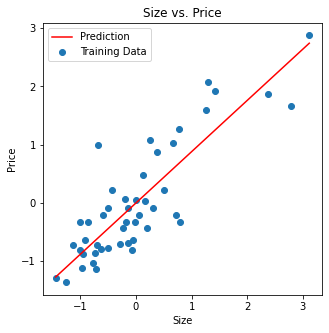

In [9]:

# get best fit line for Size vs. Price

x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

x 
 [-2.85185864 -2.79876402 -2.74566941 -2.69257479 -2.63948018 -2.58638556
 -2.53329095 -2.48019633 -2.42710172 -2.3740071  -2.32091249 -2.26781787
 -2.21472325 -2.16162864 -2.10853402 -2.05543941 -2.00234479 -1.94925018
 -1.89615556 -1.84306095 -1.78996633 -1.73687172 -1.6837771  -1.63068249
 -1.57758787 -1.52449326 -1.47139864 -1.41830403 -1.36520941 -1.3121148
 -1.25902018 -1.20592557 -1.15283095 -1.09973634 -1.04664172 -0.99354711
 -0.94045249 -0.88735788 -0.83426326 -0.78116865 -0.72807403 -0.67497942
 -0.6218848  -0.56879019 -0.51569557 -0.46260096 -0.40950634 -0.35641173
 -0.30331711 -0.25022249 -0.19712788 -0.14403326 -0.09093865 -0.03784403
  0.01525058  0.0683452   0.12143981  0.17453443  0.22762904  0.28072366
  0.33381827  0.38691289  0.4400075   0.49310212  0.54619673  0.59929135
  0.65238596  0.70548058  0.75857519  0.81166981  0.86476442  0.91785904
  0.97095365  1.02404827  1.07714288  1.1302375   1.18333211  1.23642673
  1.28952134  1.34261596  1.39571057  1.44880519

Text(0.5, 1.0, 'Size vs. Price')

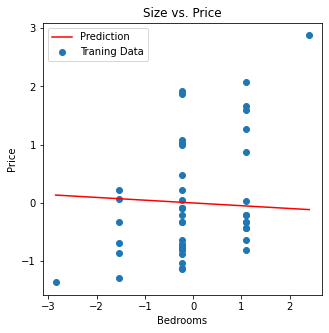

In [14]:
# get best fit line for Bedrooms vs. Price

x = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 2] * x)
print('f \n',f)

# draw the line  for Bedrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')


Text(0.5, 1.0, 'Error vs. Training Epoch')

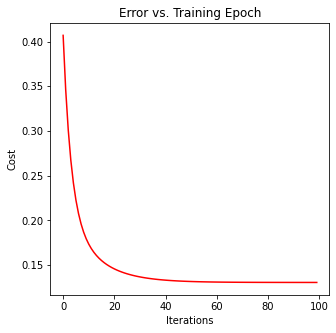

In [11]:

# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
